# Feature Finding

## Centroids

In [9]:
from alpharaw.feature.centroids import *
import numpy as np

In [10]:
def test_find_centroid_connections():
    row_borders = np.array([3, 6, 9])
    rowwise_peaks = np.array([3, 3, 3])
    max_gap = 2

    score = np.full((3,3, max_gap), np.inf)
    connections = np.full((3,3, max_gap), -1)

    centroids = np.array([10, 20, 30, 10.2, 40.1, 40, 50, 60])
    centroid_tol = 0.5*1e6

    from_r, from_c, to_r, to_c, score_median, score_std = find_centroid_connections(rowwise_peaks, row_borders, centroids, max_gap, centroid_tol)

    assert np.allclose(from_r, np.array([0, 0, 1, 1])) #e.g. 0,0 is connected to 0,1 -> 10 to 10.2
    assert np.allclose(from_c, np.array([0, 2, 1, 2]))
    assert np.allclose(to_r, np.array([1, 1, 2, 2]))
    assert np.allclose(to_c, np.array([0, 1, 0, 0]))

test_find_centroid_connections()

100%|██████████| 3/3 [00:00<00:00, 62291.64it/s]


100%|██████████| 5/5 [00:00<00:00, 119156.36it/s]

Centroid Connections from [0 1 2 3] to [3 4 6 5]


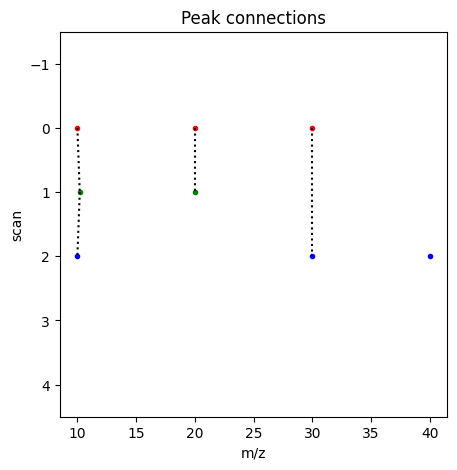

In [11]:
#Sample snippet to show centroid conncetions

import matplotlib.pyplot as plt

row_borders = np.array([3, 5, 7])
rowwise_peaks = np.array([3, 2, 3])
max_gap = 2

score = np.full((3,3, max_gap), np.inf)
connections = np.full((3,3, max_gap), -1)

centroids = np.array([10, 20, 30,
                      10.2, 20,
                      10, 30, 40])

centroid_tol = 0.5*1e5

from_idx, to_idx, score_median, score_std = connect_centroids(rowwise_peaks, row_borders, centroids, max_gap, centroid_tol)

scan_no = np.array([0, 0, 0,
                    1, 1,
                    2, 2, 2])

print(f'Centroid Connections from {from_idx} to {to_idx}')

plt.figure(figsize=(5,5))

colors = ['r','g','b']

for x,y in zip(centroids, scan_no):
    plt.plot(x, y, '.', color=colors[y])

for i, _ in enumerate(from_idx):
    from_ = _
    to_ = to_idx[i]
    plt.plot([centroids[from_], centroids[to_]], [scan_no[from_], scan_no[to_]], 'k:')
    
plt.ylabel('scan')
plt.xlabel('m/z')
plt.ylim(len(row_borders)+1.5, -1.5)
plt.title('Peak connections')
plt.show()
     

In [12]:
def test_connect_centroids():
    row_borders = np.array([3, 6, 9])
    rowwise_peaks = np.array([3, 3, 3])
    max_gap = 2

    score = np.full((3,3, max_gap), np.inf)
    connections = np.full((3,3, max_gap), -1)

    centroids = np.array([10, 20, 30, 10.2, 20, 10, 30, 40])
    centroid_tol = 0.5*1e5

    from_idx, to_idx, score_median, score_std = connect_centroids(rowwise_peaks, row_borders, centroids, max_gap, centroid_tol)

    assert np.allclose(from_idx, np.array([0, 1, 2]))
    assert np.allclose(to_idx, np.array([3, 4, 6]))

test_connect_centroids()

100%|██████████| 3/3 [00:00<00:00, 100663.30it/s]


## Hills 

In [13]:
from alpharaw.feature.hills import *

In [14]:
def test_fast_minima():
    assert fast_minima(np.array([3,2,1,0,1,2,3])) == 3
    assert fast_minima(np.array([4,3,2,1,0,1,2])) == 4
    assert len(fast_minima(np.array([5,4,3,2,1,0,1]))) == 0
    assert len(fast_minima(np.array([6,5,4,3,2,1,0]))) == 0

test_fast_minima()

## Isotope Patterns

In [15]:
from alpharaw.feature.isotope_pattern import *

In [16]:
def test_check_isotope_pattern():
    charge = 1

    mass1, delta_mass1 = 100, 0.1
    mass2, delta_mass2 = 101.1, 0.05

    assert check_isotope_pattern(mass1, mass2, delta_mass1, delta_mass2, charge) == True

    mass2, delta_mass2 = 102.1, 0.05

    assert check_isotope_pattern(mass1, mass2, delta_mass1, delta_mass2, charge) == False

test_check_isotope_pattern()

## Wrapper